In [1]:
###############################################################################
# Imports
###############################################################################

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

Using TensorFlow backend.


In [2]:
###############################################################################
# Data
###############################################################################

houses = np.array([
    [.4, 1.0],
    [.3, .7],
    [.5, .3],
    [.2, .0],
    [.7, 1.8],
    [.5, .6],
    [.4, .0],
    [.3, .0],
    [.5, .3],
    [.3, .7],
    [.5, 1.0],
    [.4, .7],
    [.6, .3],
    [.3, .0],
    [.8, 1.8],
    [.6, .6],
    [.5, .0],
    [.4, .0],
    [.6, .3],
    [.4, .7]
])

prices = np.array([
    0.198,
    0.160,
    0.436,
    0.306,
    0.344,
    0.376,
    0.597,
    0.446,
    0.441,
    0.150,
    0.293,
    0.270,
    0.532,
    0.457,
    0.444,
    0.476,
    0.747,
    0.596,
    0.541,
    0.250
])

In [3]:
###############################################################################
## Create Network
###############################################################################

# 1. Network topology
# - Input layer: 2 nodes (rooms, age)
# - Hidden Layer: 2 nodes with relu activation
# - Output Layer: 1 node (price)
model = Sequential();
model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(1))

# 2. Configure
# - Optimization Algorithm: adam
# - Loss Function: mean_absolute_error
model.compile(optimizer='adam', loss='mean_absolute_error')


###############################################################################
# Train Network
###############################################################################

# 1. fit the data
# - configure epochs
train_data = model.fit(houses, prices, epochs=200, verbose=False)

# 2. print the accuracy
print('Average loss: $' + str(train_data.history['loss'][-1] * 1000000))

Average loss: $42792.8715944


In [4]:
###############################################################################
# Make Predictions
###############################################################################
p = model.predict(houses)[:,0]

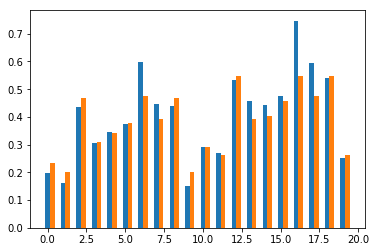

In [5]:
###############################################################################
# Visualize results
###############################################################################

# 1. Plot predictions against actual results
plt.bar(range(20), prices, width=0.3)
plt.bar([x + 0.3 for x in range(20)], p, width=0.3)
plt.show()

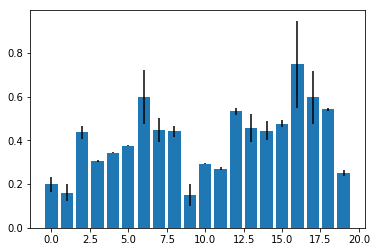

In [6]:
# 2. Plot predictions against actual results
error = np.absolute(p - prices)
plt.bar(range(20), prices, yerr=error)
plt.show()